In [1]:
#%load_ext nb_black

# Определение закономерностей влияющих на успешность игры

<p><b>Цель исследования</b> - выявить закономерности определяющие успешность игры. 
  <p><b>Задачи:</b><p>
<p><b> 1. Найти зависимость между платформой на которой издается игра и числом продаж.</b><p> 
<p>1.1 Определить <b>сколько игр</b> на платформе <b>выпускалось</b> в разные года.</p>
<p>1.2 Определить <b>как менялись продажи</b> игр на платформах в разные года. 
<p>1.3 Найти платформы <b>с наибольшими суммарными продажами.</b></p> 
<p>1.4 Определить <b>срок</b> за который <b>появляются</b> новые и <b>исчезают</b> старые платформы.</p>
<p>1.5 Найти <b>актуальный период продаж</b> необходимый для для построения прогноза на 2017 год.</p>
<p>1.6 Найти платформы <b>лидирующие по продажам.</b></p>    
<p>1.7 Найти как <b>зависит продажи</b> в других странах мира <b>от платформы.</b></p>    
<p>1.8 Определить как <b>отзывы</b> критиков и пользователей <b>влияют на продажи</b> игр внутри платформ.</p>   
<p>1.9 Определить как <b>жанры влияют на продажи игр.</b></p>   
<p><b> 2. Составить портрет пользователя.</b></p>    
<p>2.2 Определить для пользователей в <b>Северной Америки, Европе, Японии.</b></p> 
<p>а) Топ-5 самых популярных платформ.</p>
<p>б) Топ-5 самых популярных жанров.</p>
<p>в) Влияет ли рейтинг ESRB на продажи.</p> 
<p><b> 3. Проверить гипотезы.</b></p> 
<p>3.1 Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.</p>
<p>3.2 Средние пользовательские рейтинги жанров Action и Sports разные.</p>

<h1>Содержание<span class="tocSkip"></span></h1>

[1. Изучение данных из файла](#1)

   - [Вывод](#1.2)

[2. Обработка данных из файла](#2)

[3. Зависимость между платформой на которой издается игра и числом продаж](#3)

- [3.1 Определить сколько игр на платформе выпускалось в разные года](#3.1)

- [3.2 Определить продажи на платформах](#3.2)

- [3.3 Определить срок за который появляются новые и исчезают старые платформы](#3.3)

- [3.4 Найти актуальный период продаж необходимый для для построения прогноза на 2017 год](#3.4)

- [3.5 Найти платформы лидирующие по продажам](#3.5)

- [3.6 Определить как отзывы критиков и пользователей влияют на продажи игр внутри платформ](#3.6)

- [3.7 Определить как жанры влияют на продажи игр](#3.7)

- [3.8 Вывод](#3.8)

[4.Портрет пользователя каждого региона](#4)

- [4.1 Популярные платформы](#4.1)

- [4.2 Популярные жанры](#4.2)

- [4.3 Влияние рейтинга ESRB на продажи](#4.3)

- [4.4 Вывод](#4.4)

[5. Проверка гипотез](#5)

[6. Общий вывод](#6)

## 1. Изучение данных из файла <a class="anchor" id="1"></a>

In [2]:
# Импортируем библиотеки необходимые для работы
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pylab
from scipy import stats as st

In [3]:
# создадим DataFrame
df = pd.read_csv("/datasets/games.csv")

In [4]:
# выведем первые 5 строчек на экран
df.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
# выведем информацию о таблице
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Проверю уникальные значения
df.nunique()

Name               11559
Platform              31
Year_of_Release       37
Genre                 12
NA_sales             402
EU_sales             307
JP_sales             244
Other_sales          155
Critic_Score          82
User_Score            96
Rating                 8
dtype: int64

In [7]:
# Проверю дубликаты
df.duplicated().sum()

0

In [8]:
# Проверю пропущенные значения
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [9]:
# посмотрим за какое время представлены игры
print("Начало:", df["Year_of_Release"].min())
print("Конец:", df["Year_of_Release"].max())

Начало: 1980.0
Конец: 2016.0


### Вывод:<a class="anchor" id="1.2"></a>

Заголовки столбцов требуют изменения регистра на нижний. 

В таблице присутствую данные о 11559 игр (о двух игр нет названия) которые были изданы на 31 платформе.

В таблице присутствует данные о 12 жанрах (2 жанра не определены) 

В таблице 8578 игр не имеют отзывов критиков, 6701 игр не имеют отзывов пользователей, 6766 не имеют оценки ESRB.

В таблице Year_of_Release тип данных требует изменения либо на тип Data либо, на int. 

В таблице User_Score тип изменить на float.

## 2.  Обработка данных из файла <a class="anchor" id="2"></a>

In [10]:
# изменим регистр в названии столбцов
df.columns = df.columns.str.lower()

In [11]:
# проверим столбцы где у игры нет названия
df.loc[df["name"].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [12]:
df['name'].value_counts()

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [13]:
df.loc[df['name'] == 'Need for Speed: Most Wanted']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
253,Need for Speed: Most Wanted,PS2,2005.0,Racing,2.03,1.79,0.08,0.47,82.0,9.1,T
523,Need for Speed: Most Wanted,PS3,2012.0,Racing,0.71,1.46,0.06,0.58,NaN,NaN,NaN
1190,Need for Speed: Most Wanted,X360,2012.0,Racing,0.62,0.78,0.01,0.15,83.0,8.5,T
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.00,0.13,0.02,0.10,83.0,8.5,T
1998,Need for Speed: Most Wanted,XB,2005.0,Racing,0.53,0.46,0.00,0.05,83.0,8.8,T
2048,Need for Speed: Most Wanted,PSV,2012.0,Racing,0.33,0.45,0.01,0.22,NaN,NaN,NaN
3581,Need for Speed: Most Wanted,GC,2005.0,Racing,0.43,0.11,0.00,0.02,80.0,9.1,T
5972,Need for Speed: Most Wanted,PC,2005.0,Racing,0.02,0.23,0.00,0.04,82.0,8.5,T
6273,Need for Speed: Most Wanted,WiiU,2013.0,Racing,0.13,0.12,0.00,0.02,NaN,NaN,NaN
6410,Need for Speed: Most Wanted,DS,2005.0,Racing,0.24,0.01,0.00,0.02,45.0,6.1,E


In [14]:
# удаление пропущенных значений
df = df.dropna(axis="index", how="any", subset=["name"])

В столбце  **rating** значения **tbd** расшифровывается как ***to be determined***, ***to be done***. То есть, данные были специально не заполнены. Заменю tbd на Nan

In [15]:
df["user_score"] = df["user_score"].replace("tbd", np.nan, regex=True)

In [16]:
# изменим тип данных в столбце year_of_release на int а user_score на float
df["user_score"] = df["user_score"].astype("float64")

<div class="alert alert-info"> <b>Комментарий студента:</b> 
    
Спасибо за подсказку!</div>

Посмотрим на пропущенные значения в столбце **year_of_release**. Посмотрим на эти пропущенные значения, есть ли какие-то аномалии, случайны ли эти пропуски или это ошибки. Посмотрим как зависят пропущенные значения от платформы и от жанра.

In [17]:
df.loc[df["year_of_release"].isna()].head(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [18]:
# сначала посмотрим на колличество пропущенных значений по жанрам
df.loc[df["year_of_release"].isna()].groupby("genre")["platform"].count().sort_values(ascending=False)


genre
Action          62
Sports          42
Misc            29
Shooter         27
Racing          23
Role-Playing    17
Simulation      16
Fighting        12
Puzzle          11
Adventure       10
Platform        10
Strategy        10
Name: platform, dtype: int64

Проверим теперь пропущенные значения в столбце year_of_release Посмотрим что это за пропущенные значения, есть ли какие-то аномалии, случайны ли эти пропуски или это ошибки. Для этого построим зависимость пропущенных значений от платформы и от жанра.

In [19]:
# посмотрим на колличество пропущенных значений по платформам
df.loc[df["year_of_release"].isna()].groupby("platform")["genre"].count().sort_values(
    ascending=False
)

platform
PS2     34
Wii     34
DS      30
X360    30
PS3     25
XB      21
2600    17
PC      17
PSP     16
GC      14
GBA     11
3DS      8
PS       7
N64      3
GB       1
PSV      1
Name: genre, dtype: int64

Из таблиц видно, что колличество пропущенных значений в столбце year_of_release, случайно выбросов нет. Скорее всего это ошибка в программе при заполнении данных. В место пустых значений можно поставить дату релиза игры на другой игровой платформе. Но тут есть вариант что игра выпущенная на отдной платформе только черз пол года может быть выпущена на другой платформе, а если это будет уже другой год. Поэтому пропущенные значения я трогать не стал.

Посмотрим на значения пропущенные в столбце critic_score и проверим гипотезу что пропущенные значения зависят от года выпуска игры.

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
dtypes: float64(7), object(4)
memory usage: 1.5+ MB


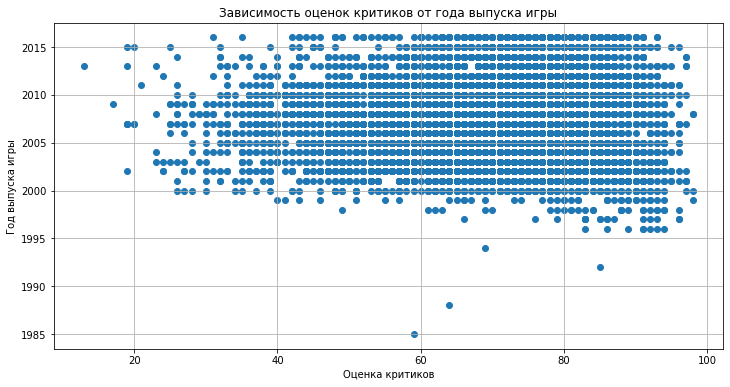

In [21]:
# построим график
plt.figure(figsize=(12, 6))
plt.scatter(df["critic_score"], df["year_of_release"])
plt.title("Зависимость оценок критиков от года выпуска игры")
plt.xlabel("Оценка критиков")
plt.ylabel("Год выпуска игры")
plt.grid()
plt.show()

Из графика видно что критики начали выставлять оценки только после 1995, посмотрим на игры которые получили оценки критиков.

In [22]:
df.loc[(df["year_of_release"] < 1995) & (df["critic_score"] > 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1567,Battle Arena Toshinden,PS,1994.0,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T
14610,Doom,PC,1992.0,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+


Из таблицы видно что это самые популярны игры на то время.

Посмотрим на значения пропущенные в столбце user_score и проверим гипотезу что пропущенные значения зависят от года выпуска игры.

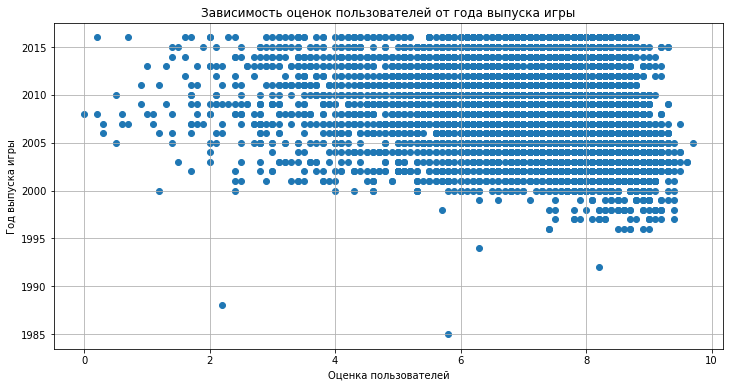

In [23]:
# построим график
plt.figure(figsize=(12, 6))
plt.scatter(df["user_score"], df["year_of_release"])
plt.title("Зависимость оценок пользователей от года выпуска игры")
plt.xlabel("Оценка пользователей")
plt.ylabel("Год выпуска игры")
plt.grid()
plt.show()

Наблюдаем здесь похожую картину, что оценки пользователей зависят от года выпуска игры. Посмотрим на четыре игры которые получили оценки критиков.

In [24]:
df.loc[(df["year_of_release"] < 1995) & (df["user_score"] > 0)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1567,Battle Arena Toshinden,PS,1994.0,Fighting,0.39,0.26,0.53,0.08,69.0,6.3,T
14470,Alter Ego,PC,1985.0,Simulation,0.00,0.03,0.00,0.01,59.0,5.8,T
14610,Doom,PC,1992.0,Shooter,0.02,0.00,0.00,0.00,85.0,8.2,M
14621,SimCity,PC,1988.0,Simulation,0.00,0.02,0.00,0.01,64.0,2.2,E10+


Здесь опять эти четыре топовые игры!!

Ну и проверим поледенею гипотезу, пропущенные значения в столбце **rating** зависят от года выпуска игры

In [25]:
df.loc[df["rating"].isna()].groupby("year_of_release")["platform"].count().sort_values(
    ascending=False
)

year_of_release
2010.0    456
2008.0    446
2011.0    433
2009.0    415
2007.0    376
1998.0    347
2006.0    328
2012.0    298
1999.0    296
2015.0    291
1997.0    270
1996.0    256
2014.0    236
2005.0    233
2013.0    228
2016.0    222
1995.0    219
2000.0    202
2002.0    174
2004.0    164
2003.0    162
2001.0    143
1994.0    120
1993.0     60
1981.0     46
1991.0     41
1992.0     41
1982.0     36
1986.0     21
1989.0     17
1983.0     17
1990.0     16
1987.0     16
1988.0     14
1984.0     14
1985.0     13
1980.0      9
Name: platform, dtype: int64

Пропущенные значения в столбце **rating** не зависят от года выпуска игры.

Посчитаем суммарные продажи.

In [26]:
# посчитаю суммарные продажи во всех регионах
df["total_sales"] = df[["na_sales", "eu_sales", "jp_sales", "other_sales"]].sum(axis=1)

In [27]:
# проверим есть ли выбросы
df["total_sales"].describe()

count    16713.000000
mean         0.533315
std          1.548282
min          0.000000
25%          0.060000
50%          0.170000
75%          0.470000
max         82.540000
Name: total_sales, dtype: float64

In [28]:
# Проверим после наших преобразований что все ОК
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       7590 non-null   float64
 10  rating           9949 non-null   object 
 11  total_sales      16713 non-null  float64
dtypes: float64(8), object(4)
memory usage: 1.7+ MB


### Вывод:  <a class="anchor" id="2.1"></a>
- В столбце **genre** (жанр) были два пропущенных значения, причем как и в названиях игр. Удалим эти две строчки.
- В столбце **year_of_release** тип значения float заменим на date.
- Пропущенные значения в столбцах **critic_score, user_score** зависят от года, так до 1995 года оценки критиками и игроками почти не выставлялись так как индустрия игр не была так развита. Значения заменять не будем. 
- Значения пропущенные в столбце **rating** не зависят от года издания игры, значения заменять не будем.

## 3. Зависимость между платформой на которой издается игра и числом продаж <a class="anchor" id="3"></a>

### 3.1 Определить сколько игр на платформе выпускалось в разные года <a class="anchor" id="3.1"></a>

In [29]:
# сгруппируем данные
df.groupby("year_of_release")["na_sales"].count().sort_values(ascending=False)

year_of_release
2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: na_sales, dtype: int64

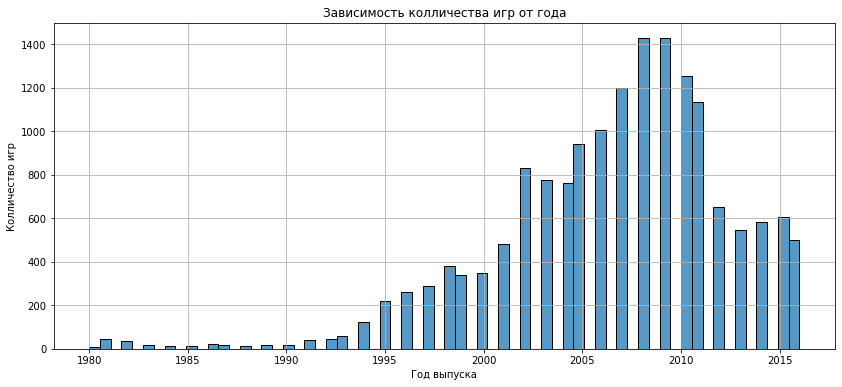

In [30]:
# построим график для наглядности
plt.figure(figsize=(14, 6))
sns.histplot(df["year_of_release"])
plt.title("Зависимость колличества игр от года")
plt.xlabel("Год выпуска")
plt.ylabel("Колличество игр")
plt.grid()
plt.show()

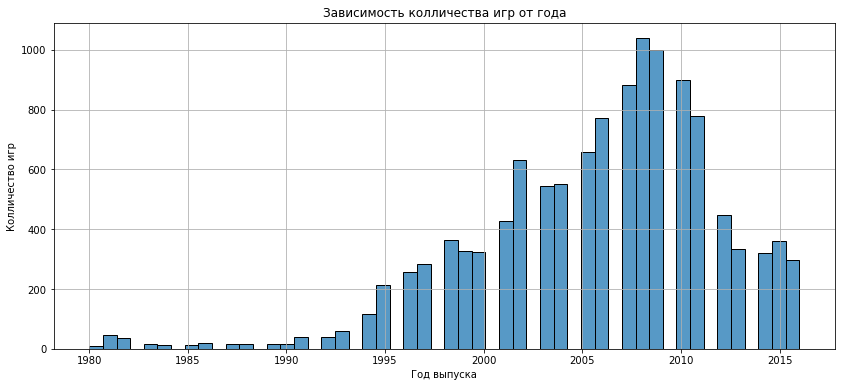

In [31]:
name_group = (
    df.groupby(["name", "year_of_release"])["year_of_release"]
    .agg(["count", "count"])
    .reset_index()
)
plt.figure(figsize=(14, 6))
sns.histplot(name_group["year_of_release"])
plt.title("Зависимость колличества игр от года")
plt.xlabel("Год выпуска")
plt.ylabel("Колличество игр")
plt.grid()
plt.show()

**Вывод**

Проанализировав данные по продажам игр по годам, а также по количеству отзывов критиков и пользователей, считаю оптимальным для анализа взять 1995 год и больше.

### 3.2 Определить как менялись продажи по платформам. <a class="anchor" id="3.2"></a>

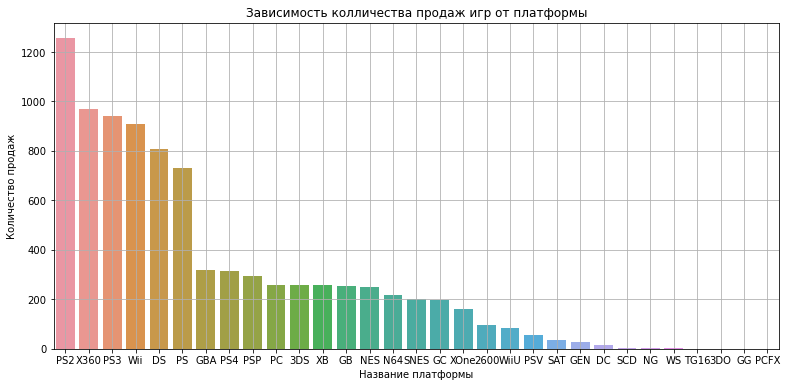

In [32]:
# сгруппируем данные по плотформам и числу продаж игр на этих платформах
sales_platforms = df.pivot_table(
    index="platform", values="total_sales", aggfunc="sum"
).sort_values(by="total_sales", ascending=False)

plt.figure(figsize=(13, 6))
sns.barplot(x=sales_platforms.index, y=sales_platforms["total_sales"])
plt.title("Зависимость колличества продаж игр от платформы")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")
plt.grid()
plt.show()

**Вывод:**

    Топ 5 популярных платформ PS2(Sony), X360(Microsoft), PS3((Sony), WII(Nintendo), DS(Nintendo), PS(Sony)

In [33]:
sales_platforms[:5]

,total_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12


In [34]:
# добавим их в отдельный список
top_sales_platforms = []
for i in range(6):
    top_sales_platforms.append(sales_platforms.index[i])
pd.Series(top_sales_platforms)

0     PS2
1    X360
2     PS3
3     Wii
4      DS
5      PS
dtype: object

### 3.3 Определить срок за который появляются новые и исчезают старые платформы. <a class="anchor" id="3.3"></a>


In [35]:
# создам Df сгруппированный по платформам и первому году издания игры
platform_life = df.groupby("platform")["year_of_release"].min()
platform_life = pd.DataFrame(platform_life)
# создам Df сгруппированный по платформам и последнему году издания игры
platform_life_max = df.groupby("platform")["year_of_release"].max()
platform_life_max = pd.DataFrame(platform_life_max)
# добавлю в основной Df rize строку с послденим годом издания игры
platform_life["max"] = platform_life_max["year_of_release"]
# поменяю названия столбцов
platform_life.columns = ["min", "max"]
# найду разницу между последним и спревым годом издания игры
platform_life["range"] = platform_life["max"] - platform_life["min"]
# отсартирую значения по убыванию
platform_life = platform_life.sort_values("range", ascending=False)

In [36]:
platform_life

,min,max,range
platform,,,
PC,1985.0,2016.0,31.0
DS,1985.0,2013.0,28.0
GB,1988.0,2001.0,13.0
X360,2005.0,2016.0,11.0
PSP,2004.0,2015.0,11.0
PS2,2000.0,2011.0,11.0
NES,1983.0,1994.0,11.0
DC,1998.0,2008.0,10.0
Wii,2006.0,2016.0,10.0


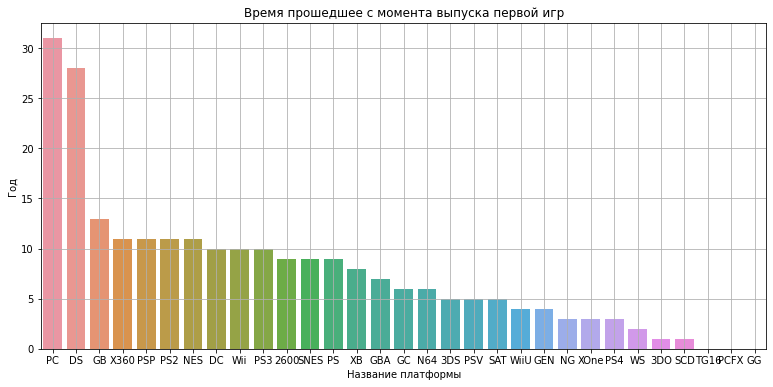

In [37]:
# построю график по фрейму rize
plt.figure(figsize=(13, 6))
sns.barplot(x=platform_life.index, y=platform_life["range"])
plt.title("Время прошедшее с момента выпуска первой игр")
plt.xlabel("Название платформы")
plt.ylabel("Год")
plt.grid()
plt.show()

In [38]:
# посчитаю среднею
platform_life["range"].mean()

7.612903225806452

**Вывод:**

Дольше всего игры издавались на DS (Nintendo), и PC, среднее время прошедшее от момента издания первого выпуска игры до издания последней игры на платформе составляет 7 с половиной лет.

In [39]:
# создадим фрейм с ТОП 5 платформ
top_platform = df.query("platform in @top_sales_platforms")

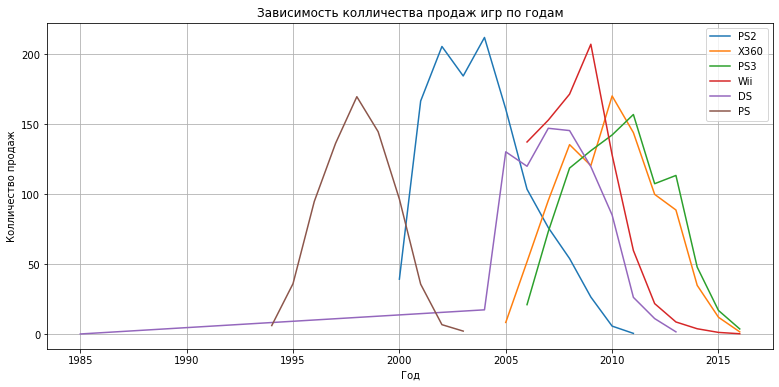

In [40]:
# построю график
plt.figure(figsize=(13, 6))
for i in top_sales_platforms:
    top_platform.loc[top_platform["platform"] == i].groupby("year_of_release")[
        "total_sales"
    ].sum().plot()
plt.title("Зависимость колличества продаж игр по годам")
plt.xlabel("Год")
plt.ylabel("Колличество продаж")
plt.legend(top_sales_platforms)
plt.grid()
plt.show()

**Вывод:**

Из графика видно что:

- DS (Nintendo) выпускалось с 1985 года топ рост продаж начался с 2004 по 2013 год, потом выручка начала падать.
- PS(Sony) на платформе выпускались игры с 1994 по 2004 год, потом игры на платформу перестали выпускать.
- PS2(Sony) на платформе выпускались игры с 2000 по 2011 год, потом игры на платформу перестали выпускать.
- Из оставшихся платформ игры выпускают на WII(Nintendo), X360(Microsoft), PS3((Sony).
- Существует тенденция к уменьшению количества игр выпускаемых на платформах.
- Больше всего выручки приносит продажи игр на платформах PS3(Sony), WII(Nintendo) и далее X360(Microsoft).


### 3.4 Найти актуальный период продаж необходимый для для построения прогноза на 2017 год.</p> <a class="anchor" id="3.4"></a>


Проанализировав все вышесказанное, можно прийти к следующим выводам для оптимального построения прогноза предлагаю взять данные с 2012 года, так как там появляется уже больше чем три платформы с данными по которым можно работать.

In [41]:
# создам Series с названиями платформ где продаж год продаж позже 2012
df_2012 = pd.Series(df["platform"].loc[df["year_of_release"] > 2012].unique())

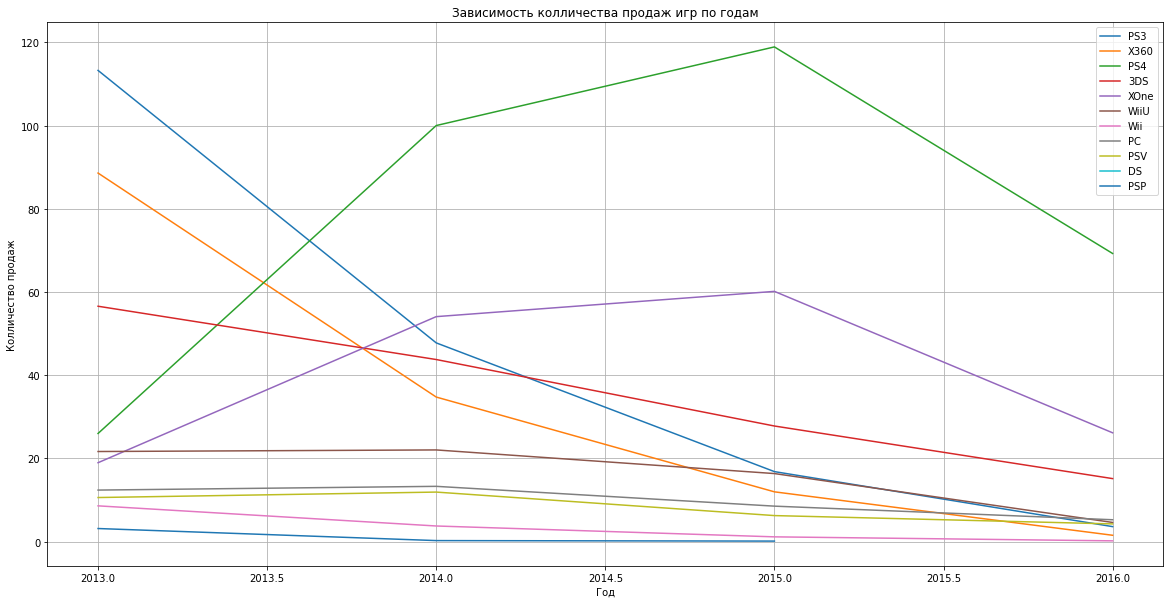

In [42]:
# построю график
plt.figure(figsize=(20, 10))
for i in df_2012:
    df.loc[(df["platform"] == i) & (df["year_of_release"] > 2012)].groupby(
        "year_of_release"
    )["total_sales"].sum().plot()
plt.title("Зависимость колличества продаж игр по годам")
plt.xlabel("Год")
plt.ylabel("Колличество продаж")
plt.legend(df_2012)
plt.grid()

**Вывод:**
- Анализируя график можно прийти к выводу, что продажи игр падают, даже не тех платформах которые только недавно вышли (PS4 и XBOX).
- Суммарная выручка от продажи игры на платформе PS4 в два раза больше чем на XBOX.

### 3.5 Найти платформы лидирующие по продажам </p> <a class="anchor" id="3.5"></a>

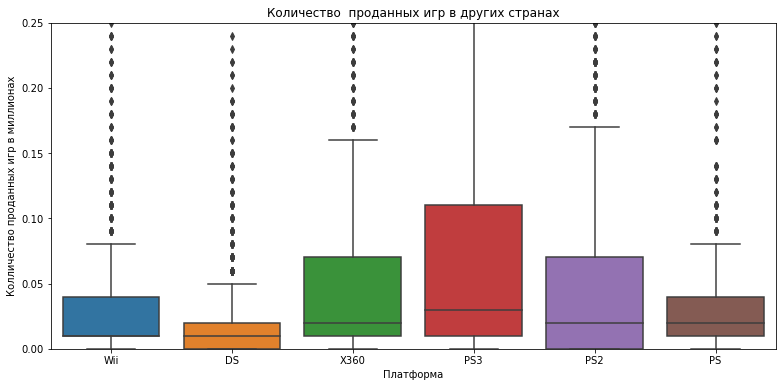

In [43]:
# построю график «ящик с усами» по глобальным продажам игр
plt.figure(figsize=(13, 6))
g = sns.boxplot(data=top_platform, x="platform", y="other_sales")
g.set(ylim=(0, 0.25))
plt.title("Количество  проданных игр в других странах")
plt.xlabel("Платформа")
plt.ylabel("Колличество проданных игр в миллионах")
plt.show()

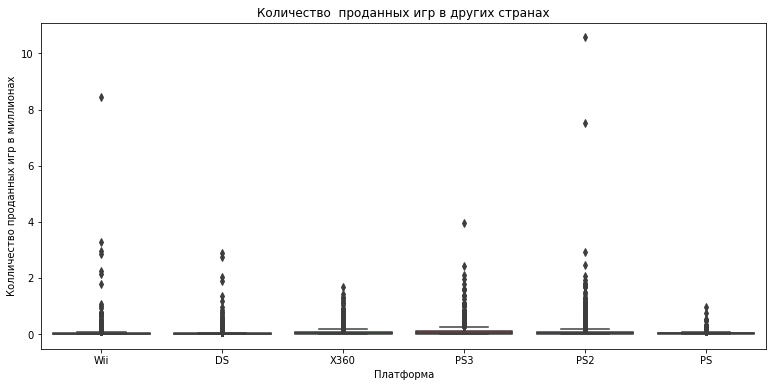

In [44]:
plt.figure(figsize=(13, 6))
g = sns.boxplot(data=top_platform, x="platform", y="other_sales")
plt.title("Количество  проданных игр в других странах")
plt.xlabel("Платформа")
plt.ylabel("Колличество проданных игр в миллионах")
plt.show()

**Вывод:**

 - На графике мы видим очень много значений которые выходят за третий квартиль.
 - Больше всего проданных игр на PS3 далее PS2 и на третьем месте X360.

### 3.6 Определить как отзывы критиков и пользователей влияют на продажи игр внутри платформ </p> <a class="anchor" id="3.6"></a>

Для анализа рассмотрим продажи игр на топ 5 популярных платформ и уберу выбросы 

In [45]:
def platform_matrix(name_of_platform):
    platform = df[df["platform"] == name_of_platform]
    ffig, ax = plt.subplots(1, 2, figsize=(15, 5))
    sns.scatterplot(x="user_score", y="total_sales", data=platform, ax=ax[0])
    sns.scatterplot(x="critic_score", y="total_sales", data=platform, ax=ax[1])

    ax[0].set(xlabel="Оценка пользователей")
    ax[1].set(xlabel="Оценка критиков")
    ax[0].set(ylabel="Количество продаж")
    ax[1].set(ylabel="Количество продаж")

    print(
        f"-----------------------------------------------------{name_of_platform}----------------------------------------------------"
    )
    correl = platform["user_score"].corr(platform["total_sales"])
    critic_correl = platform["critic_score"].corr(platform["total_sales"])
    plt.show()
    print("Корреляция между оценками пользователя и колличеством продаж", correl)
    print("Корреляция между оценками критиков и колличеством продаж", critic_correl)

-----------------------------------------------------PS2----------------------------------------------------


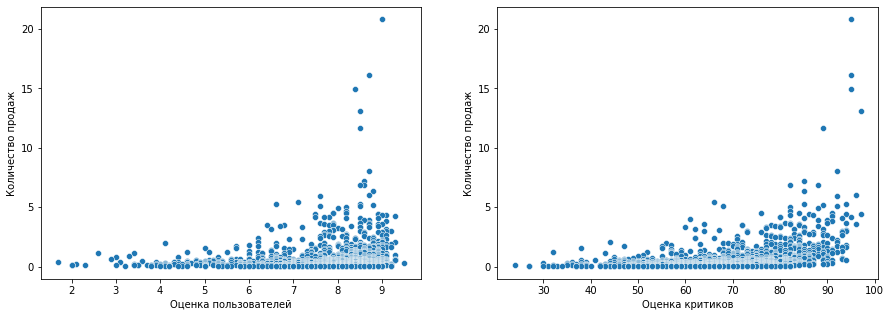

Корреляция между оценками пользователя и колличеством продаж 0.17286551112058182
Корреляция между оценками критиков и колличеством продаж 0.3954345494545488
-----------------------------------------------------X360----------------------------------------------------


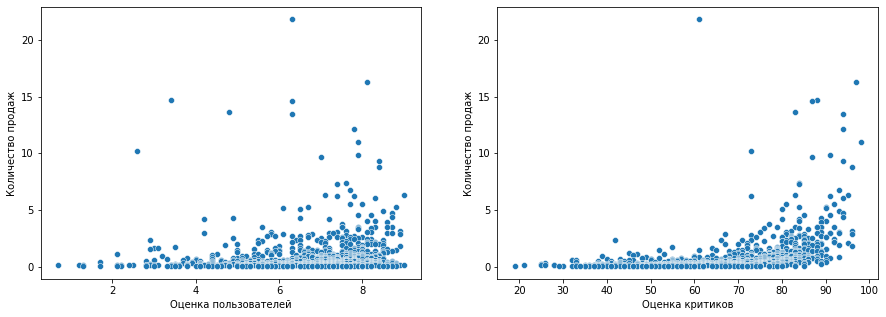

Корреляция между оценками пользователя и колличеством продаж 0.1144588297845418
Корреляция между оценками критиков и колличеством продаж 0.39373586530725874
-----------------------------------------------------PS3----------------------------------------------------


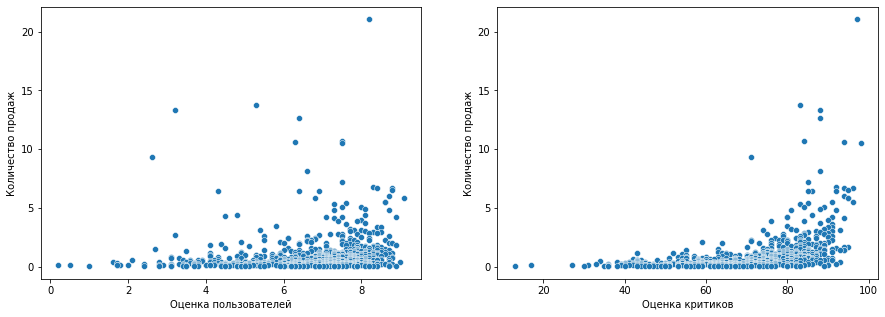

Корреляция между оценками пользователя и колличеством продаж 0.12669133936341706
Корреляция между оценками критиков и колличеством продаж 0.43243156856420617
-----------------------------------------------------Wii----------------------------------------------------


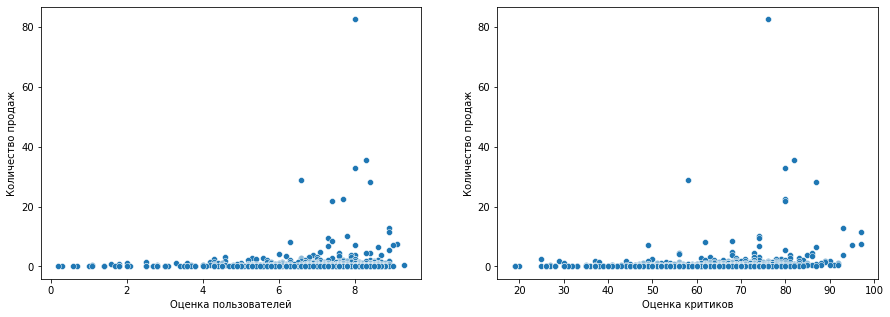

Корреляция между оценками пользователя и колличеством продаж 0.11241436067003167
Корреляция между оценками критиков и колличеством продаж 0.1775598880608996
-----------------------------------------------------DS----------------------------------------------------


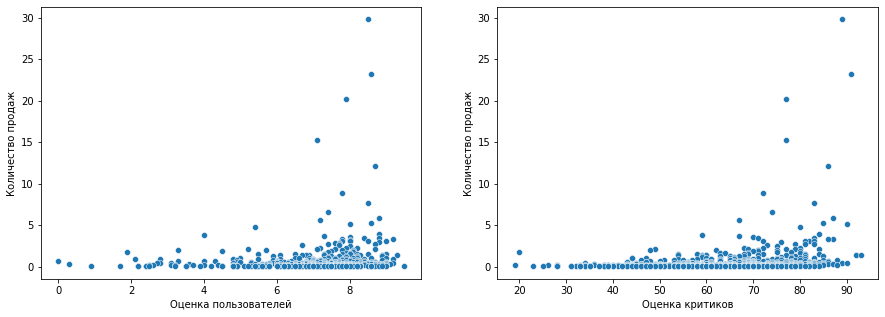

Корреляция между оценками пользователя и колличеством продаж 0.13043550111642488
Корреляция между оценками критиков и колличеством продаж 0.23637945738859714
-----------------------------------------------------PS----------------------------------------------------


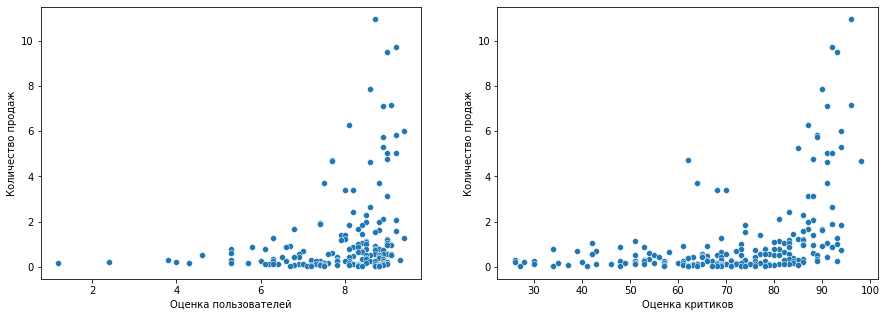

Корреляция между оценками пользователя и колличеством продаж 0.29797783612684925
Корреляция между оценками критиков и колличеством продаж 0.44563998586242454


In [46]:
for platform in top_sales_platforms:
    platform_matrix(platform)

In [47]:
# посмотрим что это за игры где колличесвто продаж больше 10  мл. может это выброс который можно будет убрать
large_total_sales = (
    df.loc[df["total_sales"] > 10]
    .groupby("name")
    .agg({"total_sales": ["count", "sum"]})
)
large_total_sales.columns = ["count", "sum"]
large_total_sales.sort_values("sum", ascending=False)

,count,sum
name,,
Wii Sports,1,82.54
Grand Theft Auto V,3,49.94
Super Mario Bros.,1,40.24
Mario Kart Wii,1,35.52
Wii Sports Resort,1,32.77
Pokemon Red/Pokemon Blue,1,31.38
Tetris,1,30.26
New Super Mario Bros.,1,29.80
Wii Play,1,28.91


Необычных игр нет. Но вот что интересно по колличеству продаж в топ выбилась игра 'Wii Sports" - эта игра быда выпущена производителм Nintendo и распротсронялась вместе с приставкой. Для Nintendo можно убрать эту игру и посмотреть как будет выглядить зависимость. 

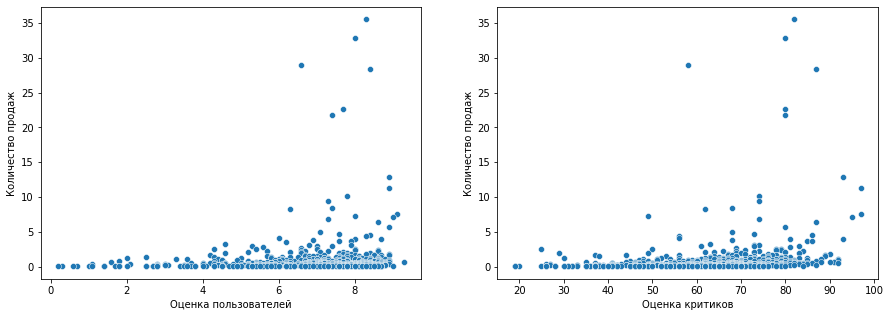

Корреляция между оценками пользователя и колличеством продаж 0.13217192230672797
Корреляция между оценками критиков и колличеством продаж 0.22119331876996856


In [48]:
platform = df[(df["platform"] == "Wii") & (df["total_sales"] < 80)]
ffig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x="user_score", y="total_sales", data=platform, ax=ax[0])
sns.scatterplot(x="critic_score", y="total_sales", data=platform, ax=ax[1])

ax[0].set(xlabel="Оценка пользователей")
ax[1].set(xlabel="Оценка критиков")
ax[0].set(ylabel="Количество продаж")
ax[1].set(ylabel="Количество продаж")

correl = platform["user_score"].corr(platform["total_sales"])
critic_correl = platform["critic_score"].corr(platform["total_sales"])
plt.show()
print("Корреляция между оценками пользователя и колличеством продаж", correl)
print("Корреляция между оценками критиков и колличеством продаж", critic_correl)

Это не сильно поменяло результат.

**Вывод:**
- Из графиков видно, что прямой (линейной) зависимости между количеством проданных игр и оценками пользователей и критиков нет.
- В тоже время мы можем наблюдать нелинейную зависимость, так при значительно высоких оценок пользователя и критика по экспоненте возрастает количество продаж.

### 3.7 Определить как жанры влияют на продажи игр </p> <a class="anchor" id="3.7"></a>

In [49]:
# сгруппируем данные по плотформам и числу продаж игр на этих платформах
genre_platform = (
    df.groupby("genre")["total_sales"]
    .agg(["mean", "median"])
    .reset_index()
    .sort_values(by="median", ascending=False)
)
genre_platform

,genre,mean,median
4,Platform,0.932173,0.27
8,Shooter,0.795503,0.24
10,Sports,0.566980,0.22
2,Fighting,0.527126,0.21
0,Action,0.517711,0.19
6,Racing,0.583403,0.19
7,Role-Playing,0.623872,0.18
3,Misc,0.458577,0.16
9,Simulation,0.446701,0.15
5,Puzzle,0.418224,0.11


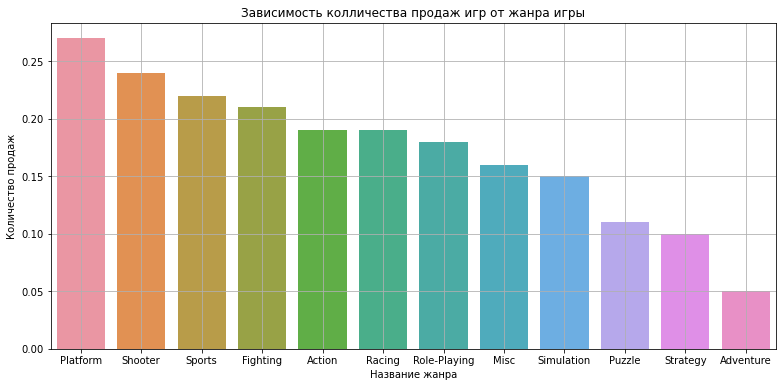

In [50]:
# построю график
plt.figure(figsize=(13, 6))
sns.barplot(data=genre_platform, x="genre", y="median")
plt.title("Зависимость колличества продаж игр от жанра игры")
plt.xlabel("Название жанра")
plt.ylabel("Количество продаж")
plt.grid()
plt.show()

### 3.8 Вывод </p> <a class="anchor" id="3.8"></a>

1. C 2005 года начался рост продаж игр, с 2010 наблюдается спад.
2. Топ самых популярных платформ в порядке убывания - PS2(Sony), X360(Microsoft), PS3((Sony), WII(Nintendo), DS(Nintendo), PS(Sony).
3. Средняя продолжительность жизни игровой платформы составляет 7 лет.
4. Самые популярные производители платформ для игр в порядке убывания - Sonу, Nintendo, Microsoft.
5. Перспективные  платформы 2016 год с наибольшим количеством продаж - PS4(Sonу) и  XBOX(Microsoft). Но на этих  платформ количество продаж игр падает.
6. Прямой (линейной) зависимости между количеством проданных игр и оценками пользователей и критиков нет. Наблюдается нелинейная зависимость, так при значительно высоких оценок пользователя и критика по экспоненте возрастает количество продаж.

## 4. Портрет пользователя каждого региона  </p> <a class="anchor" id="4"></a>

### 4.1 Популярные платформы  </p> <a class="anchor" id="4.1"></a>

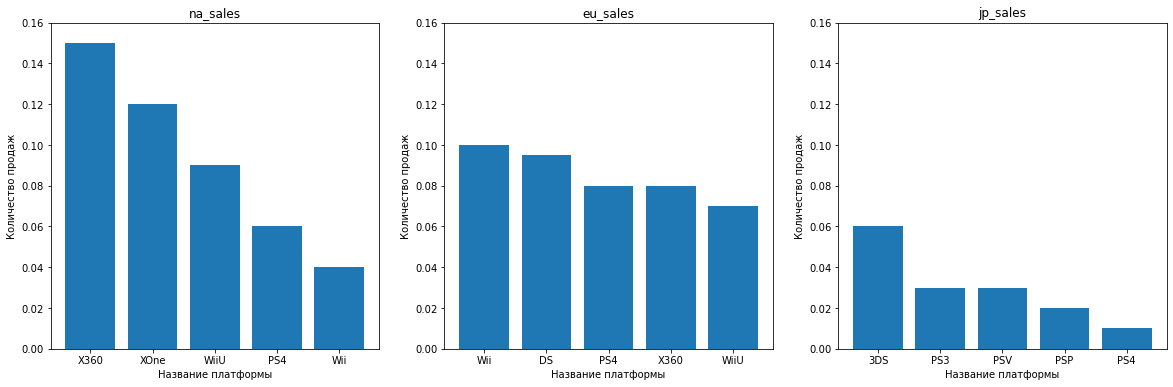

In [51]:
# Посмотрим на самые популярные платформы возьмем данные с 2012 года
n = 0
plt.figure(figsize=(20, 6))
for i in ["na_sales", "eu_sales", "jp_sales"]:
    genre_platforms = (
        df.loc[df["year_of_release"] > 2012]
        .pivot_table(index="platform", values=i, aggfunc="median")
        .sort_values(by=i, ascending=False)
        .head(5)
    )
    n += 1
    plt.subplot(1, 3, n)
    plt.bar(genre_platforms.index, genre_platforms[i])
    plt.ylim(0, 0.16)
    plt.xlabel("Название платформы")
    plt.ylabel("Количество продаж")
    plt.title(i)

**Вывод:**

- В Америке на первом месте X360, второе - Wii, третье PS2. 

- В Европе на первом месте PS3, на втором X360, на третьем Wii.

- В Японии на первом месте DS, на втором 3DS и на третьем - PS3.

**Если выпускать игры, то я бы выпускал на платформе Sony, X360 и DS** 


### 4. 2 Популярные жанры  </p> <a class="anchor" id="4.2"></a>

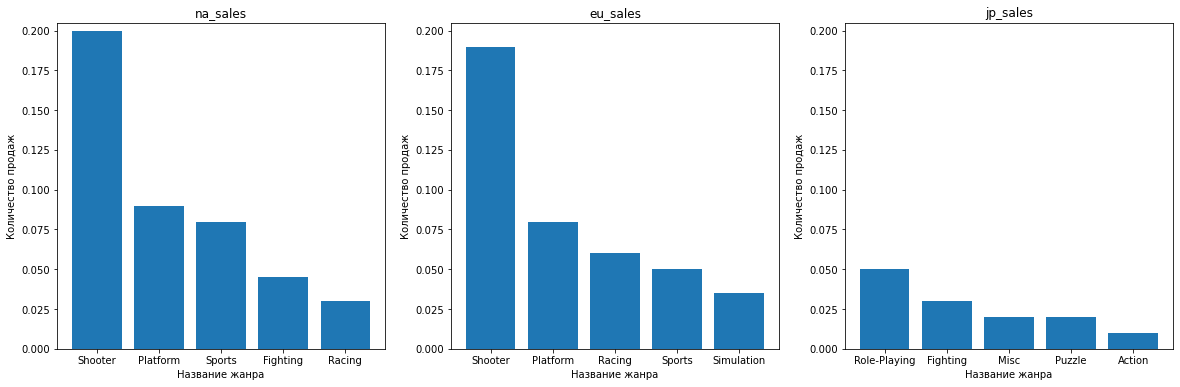

In [52]:
# Посмотрим на самые популярные жанры
n = 0
plt.figure(figsize=(20, 6))
for i in ["na_sales", "eu_sales", "jp_sales"]:
    genre_platforms = (
        df.loc[df["year_of_release"] > 2012]
        .pivot_table(index="genre", values=i, aggfunc="median")
        .sort_values(by=i, ascending=False)
        .head(5)
    )
    n += 1
    plt.subplot(1, 3, n)
    plt.bar(genre_platforms.index, genre_platforms[i])
    plt.ylim(0, 0.205)
    plt.xlabel("Название жанра")
    plt.ylabel("Количество продаж")
    plt.title(i)

**Вывод:**

- В Америке и Европе топ-5 жанров распредилились одинково за исключением на 5 место по продажам в Америке жанр Role-Playing, в Европе - Racing. 

- На первом месте по продажам игр Америка, второе - Европа, третье Япония.

- В Японии на первом месте по продажам игры в жанре Role-Playing на втором месте - Action причем колличество продаж в жанре Action почти в два раза меньше у жанра Role-Playing.

**Если выпускать игры, то я бы выпускал в жанре   Action** 

### 4. 3  Влияние рейтинга ESRB на продажи  </p> <a class="anchor" id="4.3"></a>

In [53]:
df["rating"] = df["rating"].fillna("No_rating")

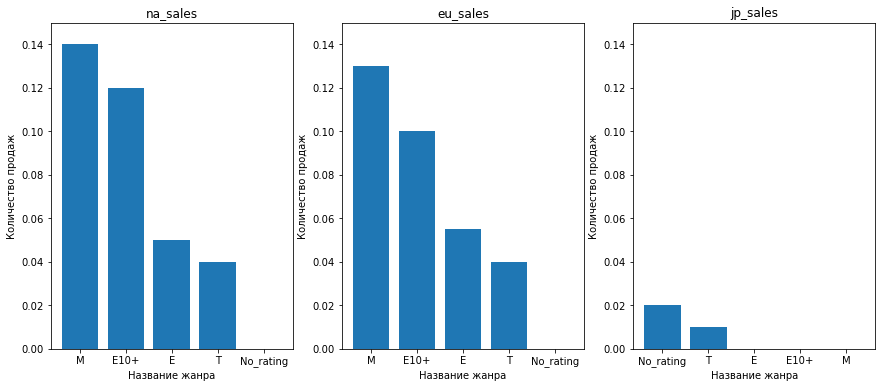

In [54]:
n = 0
plt.figure(figsize=(20, 6))
for i in ["na_sales", "eu_sales", "jp_sales"]:
    genre_platforms = (
        df.loc[df["year_of_release"] > 2012]
        .pivot_table(index="rating", values=i, aggfunc="median")
        .sort_values(by=i, ascending=False)
        .head(5)
    )
    n += 1
    plt.subplot(1, 4, n)
    plt.ylim(0, 0.15)
    plt.bar(genre_platforms.index, genre_platforms[i])
    plt.xlabel("Название жанра")
    plt.ylabel("Количество продаж")
    plt.title(i)

**Вывод**
- Колличество продаж  игр по рейтингам в Америке и Европе распределена одинаково "От 17 и выше", "для всех от 10 лет и старше" и "для всех" и на последнем месте без рейтнинга.
- В Японии все по другому на первом месте продажи игр без рейтинга и понятно что ESRB выставляет оценки играм из Америки и Канады. В Японии есть свое рейтинговое агенство CERO.

### 4. 4  Вывод  </p> <a class="anchor" id="4.4"></a>

Что-бы  **получать стабильно высокие продажи** необходимо:
 - Выпускать игры на платформе X360, XOne Wii и DS и лучше продовать их в Северной Америке и Европе.
 - Выпускать в жанре в Северной Америке и Европе - Shooter, Plarform и Sports(Северная Америка) Racing(Европа).
 - В Америке и Европе игры с рейтингом "От 17 и выше", "для всех от 10 лет и старше" и "для всех. В Японии надо посмотреть рейтинг агенства CERO.

## 5. Проверка гипотез  </p> <a class="anchor" id="5"></a>

**Сформулируем нулевые гипотезы:**

Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Когда генеральных совокупностей две, и нужно сопоставить их
средние, то-есть проверить гипотезу о равенстве среднего двух
генеральных совокупностей по взятым из них выборкам, применяется метод st.ttest_ind

In [55]:
# Сохраним в переменных xbox и pc данные  c 2012 года)
xbox = df[(df["platform"] == "XOne") & (df["year_of_release"] > 2012)]["user_score"]
pc = df[(df["platform"] == "PC") & (df["year_of_release"] > 2012)]["user_score"]

# Посчитаем средний рейтинг пользователя для xbox и PC
print("средний рейтинг пользователя для xbox платформ", xbox.mean())
print("средний рейтинг пользователя для PC платформ", pc.mean())

средний рейтинг пользователя для xbox платформ 6.52142857142857
средний рейтинг пользователя для PC платформ 6.269677419354836


In [56]:
# Выполним проверку гипотезы. Будем использовать метод ttest_ind

alpha = 0.05

results = st.ttest_ind(xbox.dropna(), pc.dropna(), equal_var=False)

print("p-значение:", results.pvalue)


if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


При проведении нашего теста мы не обнаружили статистически значимые различия в средней оценки пользователями игр на платформах PS и XBOX. 

**Сформулируем нулевые гипотезы:**

Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

In [57]:
genre_action = df[(df['genre']=='Action') & (df['year_of_release']>2012)]['user_score']
genre_sports = df[(df['genre']=='Sports') & (df['year_of_release']>2012)]['user_score']

# Посчитаем средний рейтинг пользователя для action и sports
print("средний рейтинг пользователя для xbox платформ", genre_action.mean())
print("средний рейтинг пользователя для PC платформ", genre_sports.mean())

средний рейтинг пользователя для xbox платформ 6.837532133676097
средний рейтинг пользователя для PC платформ 5.238124999999999


In [58]:
alpha = .05

results = st.ttest_ind(genre_action.dropna(), genre_sports.dropna(), equal_var=False)

print('p-значение:', results.pvalue)


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


**Вывод:** 
    
При проведении нашего теста мы обнаружили статистически значимые различия в средней оценки пользователями игр  в жанрах Action и PS. 

## 6. Общий вывод  </p> <a class="anchor" id="6"></a>

1. Успешность игры зависит от платформы на которой разработана игра. С 1985 года в ТОП-5 платформ по продажам игр вошли PS2, X360, PS3,  Wii и DS. C 2014 года в лидерах по продажам игр платформы PS4 b XOne.
2. В среднем от момента первого издания игры на платформе, до релиза последней игры проходит 7,5 лет. Дольше всех издаются игры на платформах PS и DS.
3. С 2012 года наблюдается тенденция к уменьшению числа продаж игр на различных платформах. На 2016 год  перспективными платформами для издания игр являются PS4 и ХOne.
4. Корреляции меджду оценками пользователей и колличеством продаж  почти нет, а вот  корреляция межуду оценками критиков и колличеством продаж есть, но она слабая, самую большую корреляцию мы наблюдаем у PS далее PS3, PS2, X360 по платформам фирмы Nintendo коррреляции почти нет.
5. Успешность игр зависит от жанра на котором выпущена игра. ТОП-5 жанров приносящих стабильно высокий доход -  Platform, Shooter, Sports.
6. У пользователей из регионов Северная Америка, Европа и Япония разное предпочтение в выборе платформы для игр и жанра игры. Так платформы приносящие стабильно высокий 
    - В Америке на первом месте X360, второе - XOne, третье WiiU. 
    - В Европе на первом месте Wii, на втором DS, на третьем PS4.
    - В Японии на первом месте 3DS, на втором PS3 и на третьем - PSV.
7. Рейтинг ESRB влияет на продажи. 
    - Колличество продаж  игр по рейтингам в Америке и Европе распределена одинаково "От 17 и выше", "для всех от 10 лет и старше" и "для всех" и на последнем месте без рейтнинга.
    - В Японии все по другому на первом месте продажи игр без рейтинга и понятно что ESRB выставляет оценки играм из Америки и Канады. В Японии есть свое рейтинговое агенство CERO.
8.    При проведении  теста мы не обнаружили статистически значимые различия в средней оценки пользователями игр на платформах PS и XBOX. При проведении  теста мы обнаружили статистически значимые различия в средней оценки пользователями игр на  в жанрах Action и PS. 